In [1]:
import sys
from pathlib import Path

sys.path.append((Path.cwd() / "../").resolve().as_posix())

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from researchai.layers import Dense
from researchai.activations import ReLU, Tanh
from researchai.optimizers import SGD
from researchai.commons import Softmax_CategoricalCrossentropy
from researchai.metrics import classification_accuracy
from researchai.datasets import spiral

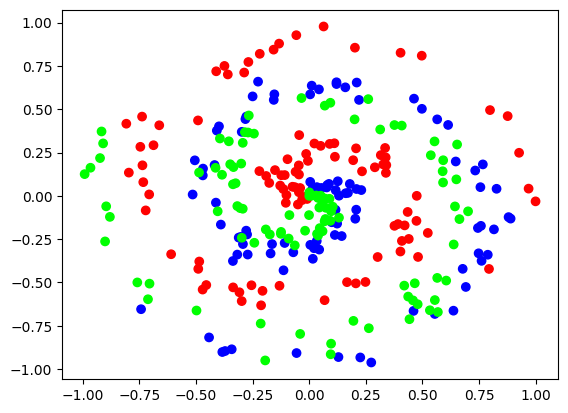

In [3]:
num_classes = 3
X, y = spiral(samples=100, classes=num_classes)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [4]:
# Expected initial loss
-np.log(1/num_classes)

1.0986122886681098

In [5]:
dense1 = Dense(2, 64, non_linearity="ReLU")
# activation1 = Tanh()
activation1 = ReLU()
dense2 = Dense(64, num_classes)

softmax_cross_entropy = Softmax_CategoricalCrossentropy()
optimizer = SGD(lr_decay=1e-3, momentum=0.9)

losses = []
accuracies = []
dense1_weigths_grads = []
dense1_biases_grads = []
dense2_weigths_grads = []
dense2_biases_grads = []
for epoch in range(10_001):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)

    loss = softmax_cross_entropy.forward(dense2.outputs, y)
    acc = classification_accuracy(softmax_cross_entropy.outputs, y)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.3f}, Acc: {acc:.3f}, lr: {optimizer.current_lr:.3f}")

    # Backward pass
    softmax_cross_entropy.backward()
    dense2.backward(softmax_cross_entropy.inputs_grad)
    activation1.backward(dense2.inputs_grad)
    dense1.backward(activation1.inputs_grad)

    # log
    losses.append(loss)
    accuracies.append(acc)
    dense1_weigths_grads.append(dense1.weights_grad)
    dense1_biases_grads.append(dense1.biases_grad)
    dense2_weigths_grads.append(dense2.weights_grad)
    dense2_biases_grads.append(dense2.biases_grad)

    # Update params
    optimizer.pre_step()
    optimizer.step(dense1)
    optimizer.step(dense2)
    optimizer.post_step()   

    # break 


Epoch: 0, Loss: 1.130, Acc: 0.383, lr: 1.000
Epoch: 100, Loss: 0.986, Acc: 0.547, lr: 0.910
Epoch: 200, Loss: 0.847, Acc: 0.657, lr: 0.834
Epoch: 300, Loss: 0.722, Acc: 0.700, lr: 0.770
Epoch: 400, Loss: 0.574, Acc: 0.767, lr: 0.715
Epoch: 500, Loss: 0.437, Acc: 0.827, lr: 0.667
Epoch: 600, Loss: 0.324, Acc: 0.890, lr: 0.625
Epoch: 700, Loss: 0.298, Acc: 0.900, lr: 0.589
Epoch: 800, Loss: 0.246, Acc: 0.913, lr: 0.556
Epoch: 900, Loss: 0.219, Acc: 0.917, lr: 0.527
Epoch: 1000, Loss: 0.203, Acc: 0.923, lr: 0.500
Epoch: 1100, Loss: 0.189, Acc: 0.930, lr: 0.476
Epoch: 1200, Loss: 0.180, Acc: 0.933, lr: 0.455
Epoch: 1300, Loss: 0.176, Acc: 0.930, lr: 0.435
Epoch: 1400, Loss: 0.165, Acc: 0.933, lr: 0.417
Epoch: 1500, Loss: 0.160, Acc: 0.937, lr: 0.400
Epoch: 1600, Loss: 0.157, Acc: 0.937, lr: 0.385
Epoch: 1700, Loss: 0.152, Acc: 0.940, lr: 0.371
Epoch: 1800, Loss: 0.149, Acc: 0.940, lr: 0.357
Epoch: 1900, Loss: 0.147, Acc: 0.943, lr: 0.345
Epoch: 2000, Loss: 0.144, Acc: 0.943, lr: 0.333
Epoc

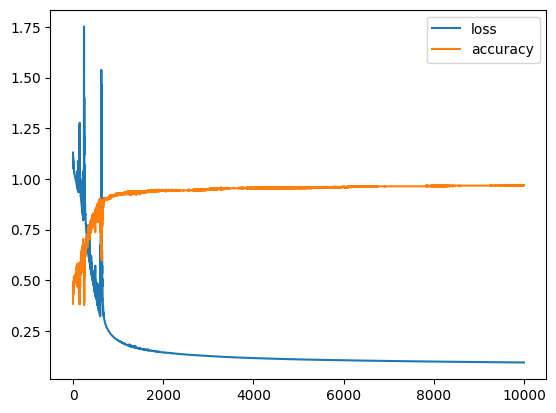

In [6]:
plt.plot(losses, label="loss")
plt.plot(accuracies, label="accuracy")

plt.legend()
plt.show()

In [8]:
import torch

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y)

dense1 = torch.nn.Linear(2, 64)
activation1 = torch.nn.ReLU()
dense2 = torch.nn.Linear(64, num_classes)

out = dense1.forward(X)
out = activation1.forward(out)
out = dense2.forward(out)

loss = torch.nn.functional.cross_entropy(out, y)
loss

C:\Users\sampa\AppData\Local\Temp\ipykernel_9228\2219808473.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\sampa\AppData\Local\Temp\ipykernel_9228\2219808473.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


tensor(1.1487, grad_fn=<NllLossBackward0>)